In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('../Resources/bank.csv')   
)

# Review the DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 2. Separate the features `X` from the target `y`

In [3]:
# Seperate the features, X,  from the target variable, y
y = df['y']
X = df.drop(columns='y')

In [4]:
# Preview the features data
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [5]:
# Preview the first five entries for the target variable
y[:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [6]:
y.value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

---
### 3. Fixing Class Imbalance with Undersampling


In [7]:
# class count
class_count_0, class_count_1 = df['y'].value_counts()

# Separate class
class_0 = df[df['y'] == 'no']
class_1 = df[df['y'] == 'yes'] # print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4000, 17)
class 1: (521, 17)


total class of 1 and0: y
no     521
yes    521
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='y'>

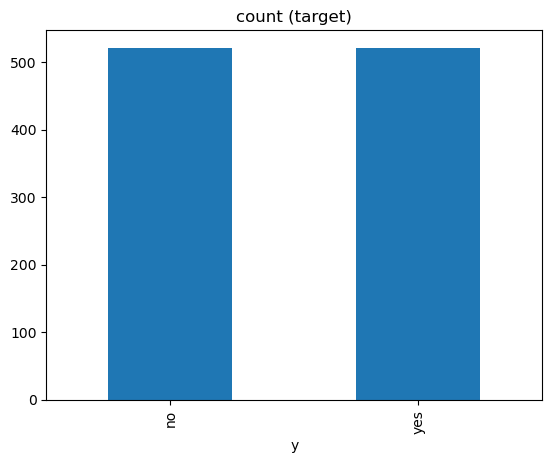

In [8]:
# Random Under-Sampling
class_0_under = class_0.sample(class_count_1)

df_undersampled = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",df_undersampled['y'].value_counts())# plot the count after under-sampeling
df_undersampled['y'].value_counts().plot(kind='bar', title='count (target)')

In [9]:
# Seperate the features, X,  from the target variable, y
y = df_undersampled['y']
X = df_undersampled.drop(columns='y')

---

### 4. Separate the data into training and testing subsets.

In [10]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 5. Prepare for Dummy-Encoding

In [11]:
# Create a list of categorical features for one-hot encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [12]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)


### 6. Define the ML engine to use

In [13]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

ML_classifier = KNeighborsClassifier(n_neighbors=3)


### 7. Set the pipeline

In [14]:
# Create a pipeline with preprocessing and KNeighborsClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier',ML_classifier )
])

### 8. Fit the pipeline using the training data.

In [15]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

### 9. Make predictions using the testing data.

In [16]:
# Predict using the pipeline
y_pred = pipeline.predict(X_test)



### 10. Generate the classification report for the test data.

In [17]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.61      0.75      0.67       130
         yes       0.68      0.53      0.59       131

    accuracy                           0.64       261
   macro avg       0.64      0.64      0.63       261
weighted avg       0.64      0.64      0.63       261



### 11. "Do not Repeat Yourself" : Let's make a function

In [18]:
# Create a pipeline with preprocessing and KNeighborsClassifier
def set_and_train_pipeline (preprocessor,scaler,ML_classifier): 
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', scaler),
        ('classifier',ML_classifier )
        ])

    # fit the pipeline
    pipeline.fit(X_train, y_train)

    # Predict using the pipeline
    y_pred = pipeline.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, y_pred))

    # return the pipeline
    return pipeline
    


### 12. Try with another ML engine 

In [19]:
# Fit the pipeline to the training data

from sklearn.ensemble import AdaBoostClassifier

preprocessor = preprocessor
classifier = AdaBoostClassifier(n_estimators=800, learning_rate=0.1, random_state=1)  # Adjust hyperparameters as needed
scaler = StandardScaler()

set_and_train_pipeline(preprocessor,scaler,classifier)

              precision    recall  f1-score   support

          no       0.79      0.81      0.80       130
         yes       0.80      0.79      0.80       131

    accuracy                           0.80       261
   macro avg       0.80      0.80      0.80       261
weighted avg       0.80      0.80      0.80       261



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=800,
                                    random_state=1))])

In [20]:
# Fit the pipeline to the training data

from catboost import CatBoostClassifier

preprocessor = preprocessor
classifier = CatBoostClassifier(iterations=800, depth=3, learning_rate=0.1, verbose=0)  # Adjust hyperparameters as needed
scaler = StandardScaler()

set_and_train_pipeline(preprocessor,scaler,classifier)

              precision    recall  f1-score   support

          no       0.81      0.84      0.82       130
         yes       0.83      0.80      0.82       131

    accuracy                           0.82       261
   macro avg       0.82      0.82      0.82       261
weighted avg       0.82      0.82      0.82       261



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x13e6e5450>)])